# Day 8: Agenda

- Missing Value Analysis
- Reshaping
    - unstack
    - melt
    - pivot
- Combining
    - merge
    - join
- Indexes and Locators
- Visualization

In [1]:
import pandas as pd
import numpy as np

In [2]:
mpg = pd.read_csv('data/auto-mpg.csv')
mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger


In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    object 
 8   name    392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ KB


In [4]:
mpg.describe()

,mpg,cyl,displ,hp,weight,accel,yr
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
mpg.describe(include=['O'])

,origin,name
count,392,392
unique,3,301
top,US,amc matador
freq,245,5


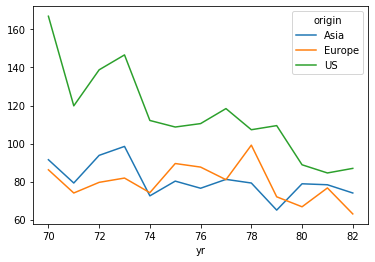

In [23]:
# 1. What origin values exist in the data?
mpg.origin.unique()

# Percentage of data attributed to each region of origin
mpg.origin.value_counts() / len(mpg) * 100

# 2. Count of data for US origin
len(mpg[mpg.origin == 'US'])

# 3. Mean hp for vehicles of US origin
mpg[mpg.origin == 'US'].hp.mean()

# 4. Average hp of vehicles in the US region over the years
mpg[mpg.origin == 'US'].groupby('yr').hp.mean()

# 5. Average hp of vehicles over the years for all regions
ax = mpg.groupby(['yr','origin']).hp.mean().unstack().plot()

### Aside: Saving figures to files

In [ ]:
f = ax.get_figure()

In [26]:
f.savefig('hp-over-years-region.pdf')

In [15]:
mpg.yr.value_counts().sort_index()

70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: yr, dtype: int64

## Missing Value Analysis

In [27]:
gm = pd.read_csv('data/gapminder_tidy.csv')
gm

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia
...,...,...,...,...,...,...,...,...
10106,Åland,2002,NaN,81.800,26257.0,NaN,NaN,Europe & Central Asia
10107,Åland,2003,NaN,80.630,26347.0,NaN,NaN,Europe & Central Asia
10108,Åland,2004,NaN,79.880,26530.0,NaN,NaN,Europe & Central Asia
10109,Åland,2005,NaN,80.000,26766.0,NaN,NaN,Europe & Central Asia


In [28]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          10111 non-null  object 
 1   Year             10111 non-null  int64  
 2   fertility        10100 non-null  float64
 3   life             10111 non-null  float64
 4   population       10108 non-null  float64
 5   child_mortality  9210 non-null   float64
 6   gdp              9000 non-null   float64
 7   region           10111 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 632.1+ KB


In [29]:
gm.isna()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
10106,False,False,True,False,False,True,True,False
10107,False,False,True,False,False,True,True,False
10108,False,False,True,False,False,True,True,False
10109,False,False,True,False,False,True,True,False


In [30]:
gm.fertility.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10106     True
10107     True
10108     True
10109     True
10110     True
Name: fertility, Length: 10111, dtype: bool

In [45]:
gm.fertility.isna().sum()

11

In [47]:
gm.isna().sum() / len(gm) * 100

Country             0.000000
Year                0.000000
fertility           0.108792
life                0.000000
population          0.029671
child_mortality     8.911087
gdp                10.988033
region              0.000000
dtype: float64

In [31]:
num = input('Enter num: ')

Enter num: 123


In [33]:
int(num)

123

In [34]:
int(True)

1

In [35]:
int(False)

0

In [37]:
bool(-1)

True

In [38]:
bool(0)

False

In [39]:
bool('adf')

True

In [40]:
bool('')

False

In [41]:
10 + True

11

In [44]:
sum([1,2,3,4])
sum([True, True, False, False, True])

3

### Dropping NaN's

In [53]:
postdrop = gm.dropna(thresh=6)
postdrop

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia
...,...,...,...,...,...,...,...,...
10096,Zimbabwe,2009,3.792,51.234,12473992.0,97.3,1352.0,Sub-Saharan Africa
10097,Zimbabwe,2010,3.721,53.684,12571454.0,95.1,1484.0,Sub-Saharan Africa
10098,Zimbabwe,2011,3.643,56.040,12754378.0,92.0,1626.0,Sub-Saharan Africa
10099,Zimbabwe,2012,3.564,58.142,13013678.0,86.7,1750.0,Sub-Saharan Africa


### Filling NaN's

In [56]:
postdrop.describe()

,Year,fertility,life,population,child_mortality,gdp
count,10100.000000,10100.000000,10100.000000,1.010000e+04,9210.000000,9000.000000
mean,1988.500000,4.028719,64.062211,2.562474e+07,80.834505,12746.916667
std,14.431584,2.013968,11.117192,1.032767e+08,79.220942,17797.809953
min,1964.000000,0.836000,6.000000,2.917500e+04,2.000000,142.000000
25%,1976.000000,2.175750,56.275500,8.920585e+05,18.900000,2263.000000
50%,1988.500000,3.632500,67.138500,4.776984e+06,50.700000,6438.500000
75%,2001.000000,5.905250,72.461500,1.479565e+07,121.775000,15887.250000
max,2013.000000,9.223000,83.580000,1.359368e+09,435.800000,182668.000000


In [57]:
postdrop.fillna(0).describe()

,Year,fertility,life,population,child_mortality,gdp
count,10100.000000,10100.000000,10100.000000,1.010000e+04,10100.000000,10100.000000
mean,1988.500000,4.028719,64.062211,2.562474e+07,73.711464,11358.638614
std,14.431584,2.013968,11.117192,1.032767e+08,79.044131,17263.554016
min,1964.000000,0.836000,6.000000,2.917500e+04,0.000000,0.000000
25%,1976.000000,2.175750,56.275500,8.920585e+05,14.115000,1545.750000
50%,1988.500000,3.632500,67.138500,4.776984e+06,40.300000,5065.000000
75%,2001.000000,5.905250,72.461500,1.479565e+07,112.700000,14033.500000
max,2013.000000,9.223000,83.580000,1.359368e+09,435.800000,182668.000000


In [59]:
# Fill with mean values of each column
postdrop.fillna({'child_mortality': postdrop.child_mortality.mean(), 
                 'gdp': postdrop.gdp.mean()}
               ).describe()

,Year,fertility,life,population,child_mortality,gdp
count,10100.000000,10100.000000,10100.000000,1.010000e+04,10100.000000,10100.000000
mean,1988.500000,4.028719,64.062211,2.562474e+07,80.834505,12746.916667
std,14.431584,2.013968,11.117192,1.032767e+08,75.649673,16800.588892
min,1964.000000,0.836000,6.000000,2.917500e+04,2.000000,142.000000
25%,1976.000000,2.175750,56.275500,8.920585e+05,20.697500,2588.750000
50%,1988.500000,3.632500,67.138500,4.776984e+06,61.300000,8198.500000
75%,2001.000000,5.905250,72.461500,1.479565e+07,112.700000,14033.500000
max,2013.000000,9.223000,83.580000,1.359368e+09,435.800000,182668.000000


In [63]:
postdrop.fillna(method='bfill').describe()

,Year,fertility,life,population,child_mortality,gdp
count,10100.000000,10100.000000,10100.000000,1.010000e+04,10100.0000,10100.000000
mean,1988.500000,4.028719,64.062211,2.562474e+07,82.4469,12256.084158
std,14.431584,2.013968,11.117192,1.032767e+08,78.8150,17082.292312
min,1964.000000,0.836000,6.000000,2.917500e+04,2.0000,142.000000
25%,1976.000000,2.175750,56.275500,8.920585e+05,20.5575,2403.000000
50%,1988.500000,3.632500,67.138500,4.776984e+06,51.2500,6134.000000
75%,2001.000000,5.905250,72.461500,1.479565e+07,126.4650,15734.250000
max,2013.000000,9.223000,83.580000,1.359368e+09,435.8000,182668.000000


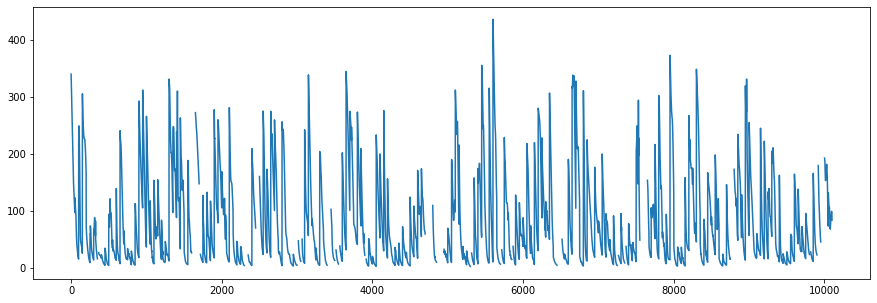

In [65]:
postdrop.child_mortality.plot(figsize=(15,5))

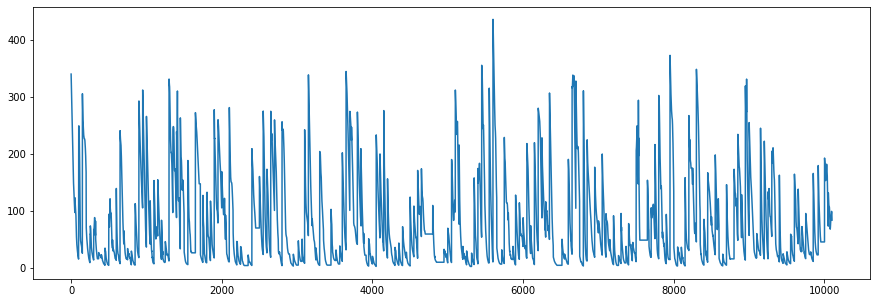

In [66]:
postdrop.child_mortality.fillna(method='ffill').plot(figsize=(15,5))

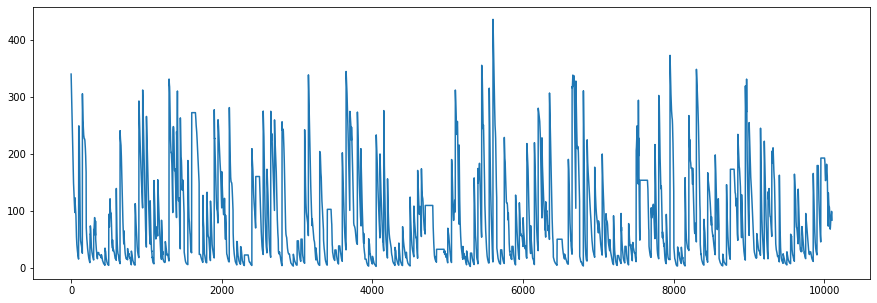

In [67]:
postdrop.child_mortality.fillna(method='bfill').plot(figsize=(15,5))

In [70]:
final = postdrop.fillna(method='bfill')
final.isna().sum().sum()

0

In [71]:
gm.isna().sum().sum()

2026

In [72]:
postdrop.isna().sum().sum()

1990

### Other formal techniques for filling missing values

- Imputation
- Interpolation

## Reshaping

In [73]:
cmort = pd.read_csv('data/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
cmort

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,471.0,468.0,465.0,461.0,458.0,455.0,452.0,449.0,446.0,...,3.73,3.70,3.67,3.65,3.62,3.59,3.56,3.54,3.51,3.51
193,Yemen,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,...,14.30,14.10,13.80,13.60,13.40,13.20,13.00,12.80,12.60,12.60
194,South Africa,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,...,10.50,10.40,10.20,10.10,9.95,9.82,9.68,9.55,9.42,9.42
195,Zambia,410.0,410.0,410.0,410.0,410.0,410.0,410.0,410.0,410.0,...,12.50,12.30,12.20,12.10,11.90,11.80,11.70,11.60,11.40,11.40


In [79]:
cmort_melted = cmort.melt(id_vars=['country'], var_name='year', value_name='child_mortality')
cmort_melted

,country,year,child_mortality
0,Afghanistan,1800,469.00
1,Angola,1800,486.00
2,Albania,1800,375.00
3,Andorra,1800,NaN
4,United Arab Emirates,1800,434.00
...,...,...,...
59292,Samoa,2100,3.51
59293,Yemen,2100,12.60
59294,South Africa,2100,9.42
59295,Zambia,2100,11.40


In [81]:
c = cmort_melted
c[c.country == 'India'].child_mortality.mean()

264.165415282392

In [75]:
59494*2

118988

In [76]:
179*302

54058

In [82]:
life = pd.read_csv('data/life_expectancy_years.csv')
life

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.8,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,76.9,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.4,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1


In [84]:
life_melted = life.melt(id_vars=['country'], var_name='year', value_name='life_exp')
life_melted

,country,year,life_exp
0,Afghanistan,1800,28.2
1,Angola,1800,27.0
2,Albania,1800,35.4
3,Andorra,1800,NaN
4,United Arab Emirates,1800,30.7
...,...,...,...
58690,Samoa,2100,80.8
58691,Yemen,2100,78.0
58692,South Africa,2100,77.7
58693,Zambia,2100,77.1


In [85]:
life_melted.join(cmort_melted)

ValueError: columns overlap but no suffix specified: Index(['country', 'year'], dtype='object')

In [86]:
pd.merge(cmort_melted, life_melted)

,country,year,child_mortality,life_exp
0,Afghanistan,1800,469.00,28.2
1,Angola,1800,486.00,27.0
2,Albania,1800,375.00,35.4
3,Andorra,1800,NaN,NaN
4,United Arab Emirates,1800,434.00,30.7
...,...,...,...,...
58690,Samoa,2100,3.51,80.8
58691,Yemen,2100,12.60,78.0
58692,South Africa,2100,9.42,77.7
58693,Zambia,2100,11.40,77.1


In [88]:
pd.concat([cmort_melted, life_melted], axis=1)

,country,year,child_mortality,country,year,life_exp
0,Afghanistan,1800,469.00,Afghanistan,1800,28.2
1,Angola,1800,486.00,Angola,1800,27.0
2,Albania,1800,375.00,Albania,1800,35.4
3,Andorra,1800,NaN,Andorra,1800,NaN
4,United Arab Emirates,1800,434.00,United Arab Emirates,1800,30.7
...,...,...,...,...,...,...
59292,Samoa,2100,3.51,NaN,NaN,NaN
59293,Yemen,2100,12.60,NaN,NaN,NaN
59294,South Africa,2100,9.42,NaN,NaN,NaN
59295,Zambia,2100,11.40,NaN,NaN,NaN


In [92]:
cmort_mi = cmort_melted.set_index(['country', 'year'])
cmort_mi

,,child_mortality
country,year,
Afghanistan,1800,469.00
Angola,1800,486.00
Albania,1800,375.00
Andorra,1800,NaN
United Arab Emirates,1800,434.00
...,...,...
Samoa,2100,3.51
Yemen,2100,12.60
South Africa,2100,9.42


In [94]:
life_mi = life_melted.set_index(['country', 'year'])
life_mi

,,life_exp
country,year,
Afghanistan,1800,28.2
Angola,1800,27.0
Albania,1800,35.4
Andorra,1800,NaN
United Arab Emirates,1800,30.7
...,...,...
Samoa,2100,80.8
Yemen,2100,78.0
South Africa,2100,77.7


In [97]:
life_mi.join(cmort_mi).reset_index()

,country,year,life_exp,child_mortality
0,Afghanistan,1800,28.2,469.00
1,Angola,1800,27.0,486.00
2,Albania,1800,35.4,375.00
3,Andorra,1800,NaN,NaN
4,United Arab Emirates,1800,30.7,434.00
...,...,...,...,...
58690,Samoa,2100,80.8,3.51
58691,Yemen,2100,78.0,12.60
58692,South Africa,2100,77.7,9.42
58693,Zambia,2100,77.1,11.40


In [100]:
gmi = pd.concat([cmort_mi, life_mi], axis=1)
gmi

child_mortality  life_exp
country     year                           
Afghanistan 1800            469.0      28.2
            1801            469.0      28.2
            1802            469.0      28.2
            1803            469.0      28.2
            1804            469.0      28.2
...                           ...       ...
Zimbabwe    2096             14.1      73.9
            2097             13.9      74.0
            2098             13.8      74.2
            2099             13.7      74.3
            2100             13.7      74.4

[59297 rows x 2 columns]

In [102]:
gm = gmi.reset_index()
gm

,country,year,child_mortality,life_exp
0,Afghanistan,1800,469.0,28.2
1,Afghanistan,1801,469.0,28.2
2,Afghanistan,1802,469.0,28.2
3,Afghanistan,1803,469.0,28.2
4,Afghanistan,1804,469.0,28.2
...,...,...,...,...
59292,Zimbabwe,2096,14.1,73.9
59293,Zimbabwe,2097,13.9,74.0
59294,Zimbabwe,2098,13.8,74.2
59295,Zimbabwe,2099,13.7,74.3


In [104]:
gm[gm.country == 'India'][['child_mortality', 'life_exp']]

,child_mortality,life_exp
23478,509.00,25.4
23479,509.00,25.4
23480,509.00,25.0
23481,509.00,24.0
23482,509.00,23.5
...,...,...
23774,6.40,82.8
23775,6.31,82.9
23776,6.22,83.0
23777,6.13,83.2


In [111]:
gm[(gm.country == 'India') & (gm.year == '2023')]

,country,year,child_mortality,life_exp
23701,India,2023,30.6,71.7


In [125]:
gmi.sort_index(inplace=True)

In [126]:
gmi.loc['India']

,child_mortality,life_exp
year,,
1800,509.00,25.4
1801,509.00,25.4
1802,509.00,25.0
1803,509.00,24.0
1804,509.00,23.5
...,...,...
2096,6.40,82.8
2097,6.31,82.9
2098,6.22,83.0


In [134]:
gmi.loc['India', '2023']
gmi.loc[('India', '2023')]

child_mortality    30.6
life_exp           71.7
Name: (India, 2023), dtype: float64

In [129]:
gmi.index.is_lexsorted()

True

In [130]:
gmi.loc['Afghanistan':'India']

child_mortality  life_exp
country     year                           
Afghanistan 1800           469.00      28.2
            1801           469.00      28.2
            1802           469.00      28.2
            1803           469.00      28.2
            1804           469.00      28.2
...                           ...       ...
India       2096             6.40      82.8
            2097             6.31      82.9
            2098             6.22      83.0
            2099             6.13      83.2
            2100             6.13      83.3

[23779 rows x 2 columns]

In [132]:
gmi.loc[('Afghanistan','1804'):('India','2096')]

child_mortality  life_exp
country     year                           
Afghanistan 1804           469.00      28.2
            1805           469.00      28.2
            1806           470.00      28.1
            1807           470.00      28.1
            1808           470.00      28.1
...                           ...       ...
India       2092             6.77      82.2
            2093             6.67      82.3
            2094             6.58      82.5
            2095             6.49      82.6
            2096             6.40      82.8

[23771 rows x 2 columns]

In [135]:
gmi.loc[('Afghanistan','1804'):('India','2096'),'child_mortality']

country      year
Afghanistan  1804    469.00
             1805    469.00
             1806    470.00
             1807    470.00
             1808    470.00
                      ...  
India        2092      6.77
             2093      6.67
             2094      6.58
             2095      6.49
             2096      6.40
Name: child_mortality, Length: 23771, dtype: float64

In [136]:
gmi

child_mortality  life_exp
country     year                           
Afghanistan 1800            469.0      28.2
            1801            469.0      28.2
            1802            469.0      28.2
            1803            469.0      28.2
            1804            469.0      28.2
...                           ...       ...
Zimbabwe    2096             14.1      73.9
            2097             13.9      74.0
            2098             13.8      74.2
            2099             13.7      74.3
            2100             13.7      74.4

[59297 rows x 2 columns]

In [137]:
gmi.iloc[:100,-1]

country      year
Afghanistan  1800    28.2
             1801    28.2
             1802    28.2
             1803    28.2
             1804    28.2
                     ... 
             1895    32.4
             1896    32.5
             1897    32.7
             1898    32.9
             1899    33.1
Name: life_exp, Length: 100, dtype: float64

In [138]:
%%timeit
gm[(gm.country == 'India') & (gm.year == '2023')]

13.8 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [139]:
%%timeit
gmi.loc[('India', '2023')]

289 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Visualization

In [142]:
gm.life_exp.describe()

count    56616.000000
mean        53.353254
std         21.320534
min          1.010000
25%         32.900000
50%         50.000000
75%         74.000000
max         94.400000
Name: life_exp, dtype: float64

In [143]:
import seaborn as sns

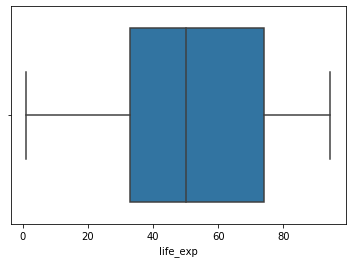

In [144]:
sns.boxplot(gm.life_exp)

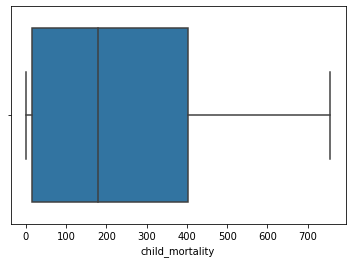

In [145]:
sns.boxplot(gm.child_mortality)

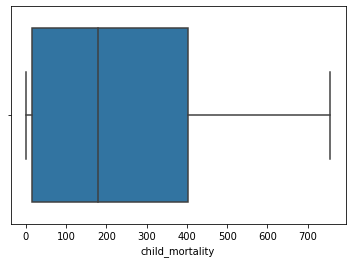

In [147]:
sns.boxplot(data=gm, x='child_mortality')

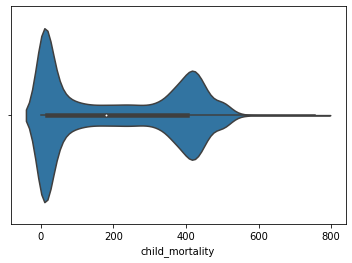

In [146]:
sns.violinplot(gm.child_mortality)

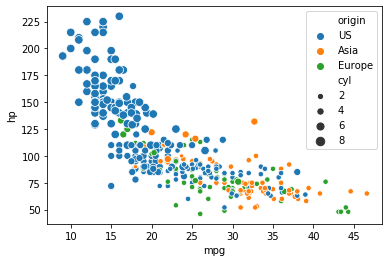

In [152]:
sns.scatterplot(data=mpg, x='mpg', y='hp', hue='origin', size='cyl')

In [150]:
mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger
